
Tree Based Models - Q06 - 07/July
===================================
After the first split on Age, on which variable(s) should we do the second split ?

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import tree

In [2]:
# Read and display the data file
df = pd.read_csv('/Users/riteshturlapaty/ai-ml-learning/AccelerateAI/7. DecisionTree/DailyQuiz/q5_data.csv')
df

,age,income,student,credit_rating,buys_laptop
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31..40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes
5,>40,low,yes,excellent,no
6,31..40,low,yes,excellent,yes
7,<=30,medium,no,fair,no
8,<=30,low,yes,fair,yes
9,>40,medium,yes,fair,yes


In [3]:
# Create dummy variables to convert string values to float as decision trees process only numeric data
df_dummies=pd.get_dummies(df)

In [4]:
# Drop dummy variables created for buys_laptop
df_dummies.drop(['buys_laptop_no','buys_laptop_yes'], axis=1, inplace=True)

In [5]:
# Display dummy variables dataframe
df_dummies

,age_31..40,age_<=30,age_>40,income_high,income_low,income_medium,student_no,student_yes,credit_rating_excellent,credit_rating_fair
0,0,1,0,1,0,0,1,0,0,1
1,0,1,0,1,0,0,1,0,1,0
2,1,0,0,1,0,0,1,0,0,1
3,0,0,1,0,0,1,1,0,0,1
4,0,0,1,0,1,0,0,1,0,1
5,0,0,1,0,1,0,0,1,1,0
6,1,0,0,0,1,0,0,1,1,0
7,0,1,0,0,0,1,1,0,0,1
8,0,1,0,0,1,0,0,1,0,1
9,0,0,1,0,0,1,0,1,0,1


In [6]:
# Attach 'buys_laptop' column to df_dummies dataframe
df_dummies['buys_laptop'] = df[['buys_laptop']]
df_dummies['buys_laptop'] = df_dummies['buys_laptop'].map({'yes':1, 'no':0})
df_dummies

,age_31..40,age_<=30,age_>40,income_high,income_low,income_medium,student_no,student_yes,credit_rating_excellent,credit_rating_fair,buys_laptop
0,0,1,0,1,0,0,1,0,0,1,0
1,0,1,0,1,0,0,1,0,1,0,0
2,1,0,0,1,0,0,1,0,0,1,1
3,0,0,1,0,0,1,1,0,0,1,1
4,0,0,1,0,1,0,0,1,0,1,1
5,0,0,1,0,1,0,0,1,1,0,0
6,1,0,0,0,1,0,0,1,1,0,1
7,0,1,0,0,0,1,1,0,0,1,0
8,0,1,0,0,1,0,0,1,0,1,1
9,0,0,1,0,0,1,0,1,0,1,1


In [7]:
# Prepare X and y
X = df_dummies.drop('buys_laptop', axis=1)
y = df_dummies['buys_laptop']

In [8]:
# ID3
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,y)

[Ellipsis]

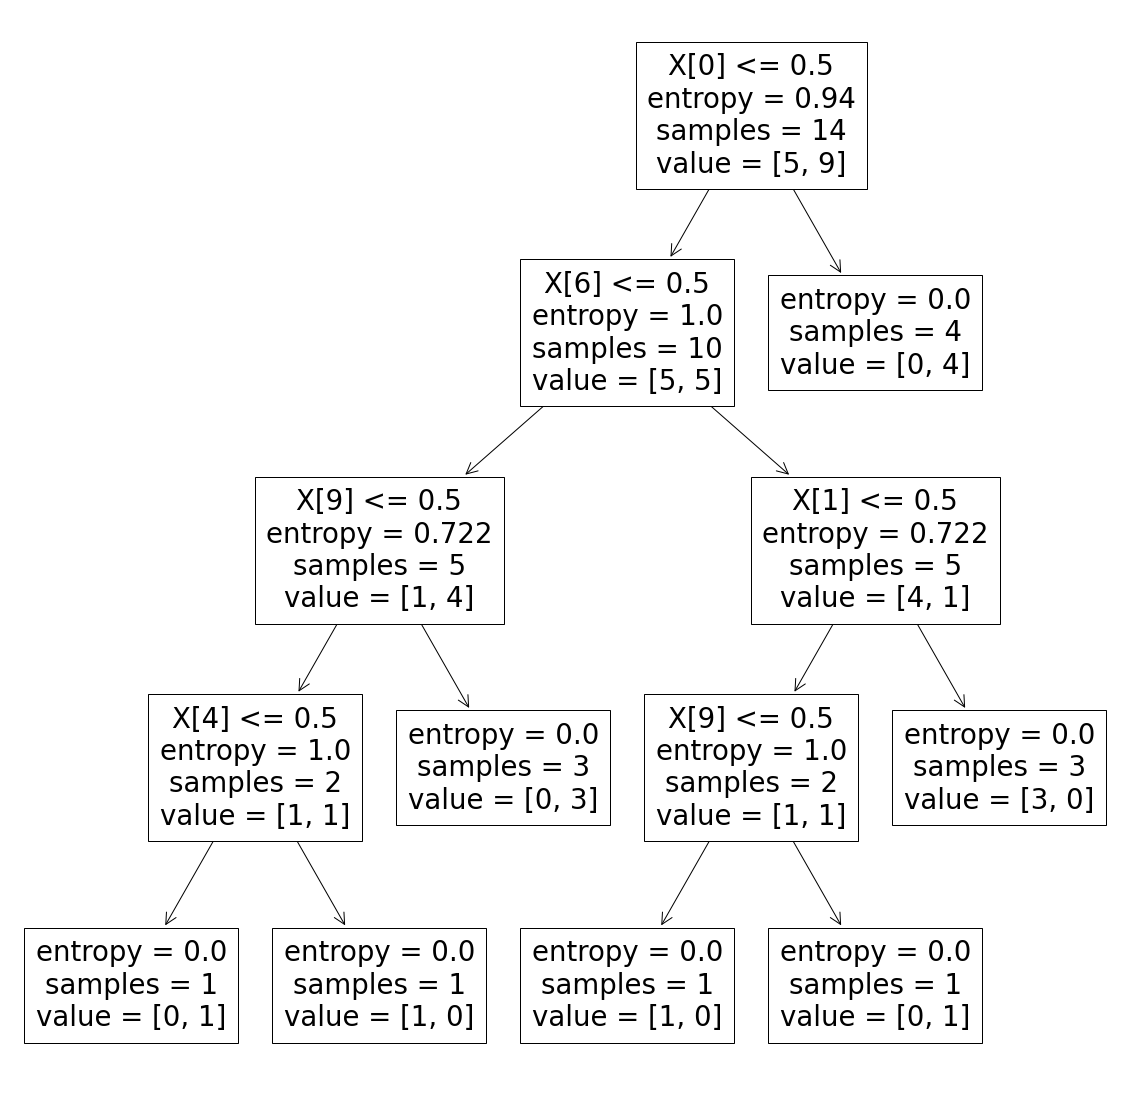

In [9]:
plt.figure(figsize=(20,20))
tree.plot_tree(clf)
[...]

After the first split on age, the next split will be on those who are not students